<a href="https://colab.research.google.com/github/simandi2877/eva/blob/master/Project10/Assignment10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras import backend as K
from keras.preprocessing import image
import numpy as np
import cv2


Using TensorFlow backend.


In [2]:
!wget 'https://media.karousell.com/media/photos/products/2018/08/20/16_scale_tony_stark_avenger3_headscrupt_with_glasses_1534759826_e79b0cf4.jpg'

--2019-07-05 14:30:12--  https://media.karousell.com/media/photos/products/2018/08/20/16_scale_tony_stark_avenger3_headscrupt_with_glasses_1534759826_e79b0cf4.jpg
Resolving media.karousell.com (media.karousell.com)... 141.101.114.84, 190.93.247.83, 190.93.244.83, ...
Connecting to media.karousell.com (media.karousell.com)|141.101.114.84|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58670 (57K) [image/jpeg]
Saving to: ‘16_scale_tony_stark_avenger3_headscrupt_with_glasses_1534759826_e79b0cf4.jpg’

16_scale_tony_stark 100%[===================>]  57.29K  --.-KB/s    in 0.004s  

2019-07-05 14:30:12 (15.3 MB/s) - ‘16_scale_tony_stark_avenger3_headscrupt_with_glasses_1534759826_e79b0cf4.jpg’ saved [58670/58670]



In [3]:
model = VGG16(weights="imagenet")
model.summary()

W0705 14:30:15.113656 140212322465664 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0705 14:30:15.174808 140212322465664 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0705 14:30:15.183001 140212322465664 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0705 14:30:15.347558 140212322465664 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



553476096/553467096 [==============================] - 44s 0us/step


W0705 14:31:02.234792 140212322465664 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0705 14:31:02.236166 140212322465664 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
from skimage import io

dog = io.imread("16_scale_tony_stark_avenger3_headscrupt_with_glasses_1534759826_e79b0cf4.jpg")
def printlayeroutput(convlayer):
  dog = io.imread("16_scale_tony_stark_avenger3_headscrupt_with_glasses_1534759826_e79b0cf4.jpg")
  dog = cv2.resize(dog, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
  x = image.img_to_array(dog)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  preds = model.predict(x)
  class_idx = np.argmax(preds[0])
  print(class_idx)
  class_output = model.output[:, class_idx]
  last_conv_layer = model.get_layer(convlayer)
  grads = K.gradients(class_output, last_conv_layer.output)[0]
  print(grads.shape)
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  print(pooled_grads.shape)
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

  pooled_grads_value, conv_layer_output_value = iterate([x])

  for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
    
  heatmap = np.mean(conv_layer_output_value, axis = -1)
  print(conv_layer_output_value.shape)
  print(heatmap.shape)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  
  heatmap = cv2.resize(heatmap, (dog.shape[1], dog.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  superimposed_img = cv2.addWeighted(dog, 0.5, heatmap, 0.5, 0)
  from google.colab.patches import cv2_imshow
  cv2_imshow( dog)
  cv2_imshow(superimposed_img)

837
(?, 14, 14, 512)
(512,)
(14, 14, 512)
(14, 14)


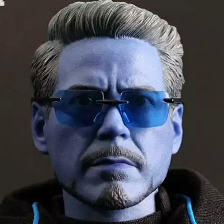

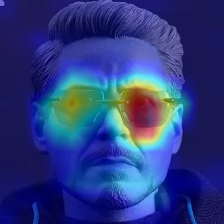

837
(?, 14, 14, 512)
(512,)
(14, 14, 512)
(14, 14)


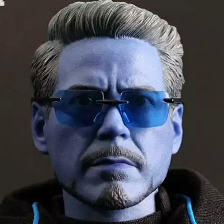

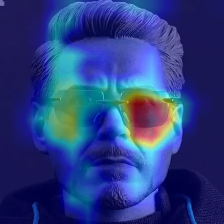

837
(?, 14, 14, 512)
(512,)
(14, 14, 512)
(14, 14)


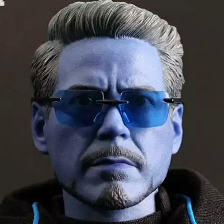

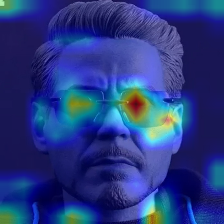

In [5]:
printlayeroutput("block5_conv3")
printlayeroutput("block5_conv2")
printlayeroutput("block5_conv1")


In [6]:
#!pip install keras-vis
!pip install pillow
!pip install git+https://github.com/raghakot/keras-vis.git



  Cloning https://github.com/raghakot/keras-vis.git to /tmp/pip-req-build-oF00Dj
  Running command git clone -q https://github.com/raghakot/keras-vis.git /tmp/pip-req-build-oF00Dj
  Stored in directory: /tmp/pip-ephem-wheel-cache-98lsmP/wheels/c5/ae/e7/b34d1cb48b1898f606a5cce08ebc9521fa0588f37f1e590d9f
Successfully built keras-vis
  Found existing installation: keras-vis 0.4.1
    Uninstalling keras-vis-0.4.1:
      Successfully uninstalled keras-vis-0.4.1


/usr/local/lib/python2.7/dist-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


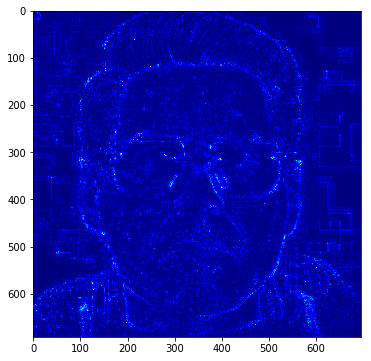

In [7]:
from vis.visualization import visualize_saliency, overlay
from vis.utils import utils
from keras import activations
import matplotlib.pyplot as plt
from vis.visualization import visualize_activation

# Utility to search for layer index by name. 
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model, 'block5_conv1')

# Swap softmax with linear
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 6)

# 20 is the imagenet category for 'ouzel'
#img = visualize_activation(model, layer_idx, filter_indices=20, seed_input=dog)
img = visualize_saliency(model, layer_idx, filter_indices=20, seed_input=dog, backprop_modifier='guided')
plt.imshow(img, cmap='jet')



# Assignment 10B

---



| Strides | Input Channels | Output Channels | j -out | r- out              |
| ------- | -------------- | --------------- | ------ | ------------------- |
| 1       | 128            | 128             | 1      | 3   (1 + (3-1)*2)   |
| 2       | 128            | 64              | 2      | 5  (3 + (3-1)*1)    |
| 1       | 64             | 64              | 2      | 9  (5  + (3-1)*2)   |
| 2       | 64             | 32              | 4      | 13   (9+(3-1)*2)    |
| 1       | 32             | 32              | 4      | 21  (13 + (3-1)*4)  |
| 2       | 32             | 16              | 8      | 29   (21 + (3-1)*4) |
| 1       | 16             | 16              | 8      | 45  (29 + (3-1)*8)  |